In [1]:
!git checkout main

fatal: not a git repository (or any of the parent directories): .git


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("omarhanyy/imdb-top-1000")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/imdb-top-1000


In [2]:
import pandas as pd
import numpy as np
import os

# 2) Îã§Ïö¥Î°úÎìúÎêú ÌååÏùº Î™©Î°ù ÌôïÏù∏
print(os.listdir(path))

# 3) CSV ÌååÏùº ÏùΩÍ∏∞ (ÌååÏùºÎ™ÖÏù¥ imdb_top_1000.csv Ïùº Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅº)
csv_file = os.path.join(path, "IMDB top 1000.csv")
df = pd.read_csv(csv_file)

# 4) DataFrame Ï∂úÎ†•
display(df.head())

['IMDB top 1000.csv']


Unnamed: 0                                              Title Certificate  \
0           0                 1. The Shawshank Redemption (1994)           R   
1           1                            2. The Godfather (1972)           R   
2           2                          3. The Dark Knight (2008)       PG-13   
3           3                   4. The Godfather: Part II (1974)           R   
4           4  5. The Lord of the Rings: The Return of the Ki...       PG-13   

  Duration                     Genre  Rate  Metascore  \
0  142 min                     Drama   9.3       80.0   
1  175 min              Crime, Drama   9.2      100.0   
2  152 min      Action, Crime, Drama   9.0       84.0   
3  202 min              Crime, Drama   9.0       90.0   
4  201 min  Action, Adventure, Drama   8.9       94.0   

                                         Description  \
0  Two imprisoned men bond over a number of years...   
1  The aging patriarch of an organized crime dyna...   
2  When the menace known as the Joker wreaks havo...   
3  The early life and career of Vito Corleone in ...   
4  Gandalf and Aragorn lead the World of Men agai...   

                                                Cast  \
0  Director: Frank Darabont | Stars: Tim Robbins,...   
1  Director: Francis Ford Coppola | Stars: Marlon...   
2  Director: Christopher Nolan | Stars: Christian...   
3  Director: Francis Ford Coppola | Stars: Al Pac...   
4  Director: Peter Jackson | Stars: Elijah Wood, ...   

                                 Info  
0   Votes: 2,295,987 | Gross: $28.34M  
1  Votes: 1,584,782 | Gross: $134.97M  
2  Votes: 2,260,649 | Gross: $534.86M  
3   Votes: 1,107,253 | Gross: $57.30M  
4  Votes: 1,614,369 | Gross: $377.85M

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1000 non-null   int64  
 1   Title        1000 non-null   object 
 2   Certificate  973 non-null    object 
 3   Duration     1000 non-null   object 
 4   Genre        1000 non-null   object 
 5   Rate         1000 non-null   float64
 6   Metascore    712 non-null    float64
 7   Description  1000 non-null   object 
 8   Cast         1000 non-null   object 
 9   Info         1000 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 78.3+ KB


### ÌäπÏÑ±(Ïª¨Îüº) Ï∂úÎ†•

In [4]:
# Ïª¨ÎüºÎ™ÖÎßå Ï∂úÎ†•
print(df.columns.tolist())

['Unnamed: 0', 'Title', 'Certificate', 'Duration', 'Genre', 'Rate', 'Metascore', 'Description', 'Cast', 'Info']


### Ïó∞ÎèÑ(Released_Year) ÌäπÏÑ± ÏÉùÏÑ±

In [5]:
# TitleÏóêÏÑú Ïó∞ÎèÑ Ï∂îÏ∂ú (Ï†ïÍ∑úÌëúÌòÑÏãù: Í¥ÑÌò∏ Ïïà 4ÏûêÎ¶¨ Ïà´Ïûê)
df["Released_Year"] = df["Title"].astype(str).str.extract(r"\((\d{4})\)")
# Ïà´ÏûêÌòïÏúºÎ°ú Î≥ÄÌôò
df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce")
# ÌôïÏù∏ ( Title, Released_Year Îßå 10Í∞ú Ï∂úÎ†•Ìï¥ÏÑú ÌôïÏù∏)
print(df[["Title", "Released_Year"]].head(10))

                                               Title  Released_Year
0                 1. The Shawshank Redemption (1994)           1994
1                            2. The Godfather (1972)           1972
2                          3. The Dark Knight (2008)           2008
3                   4. The Godfather: Part II (1974)           1974
4  5. The Lord of the Rings: The Return of the Ki...           2003
5                             6. Pulp Fiction (1994)           1994
6                         7. Schindler's List (1993)           1993
7                             8. 12 Angry Men (1957)           1957
8                                9. Inception (2010)           2010
9                              10. Fight Club (1999)           1999


### 3.2.1 Í∏∞Ï¥à ÌÜµÍ≥Ñ / Í∏∞Ïà† ÌÜµÍ≥Ñ

#### 1.ÏãúÍ∏∞ ÌäπÏÑ± ÎßåÎì§Í∏∞ ( ÏãúÍ∏∞ = 10ÎÖÑ )

In [6]:
# Decade Ïª¨Îüº ÏÉùÏÑ± (10ÎÖÑ Îã®ÏúÑ)
# 1975Ïùò Í≤ΩÏö∞: 1975//10 -> 197, 197*10 -> 1970
df["Decade"] = (df["Released_Year"] // 10) * 10
# ÌôïÏù∏
display(df[["Title", "Released_Year", "Decade"]].head(15))

Title  Released_Year  Decade
0                  1. The Shawshank Redemption (1994)           1994    1990
1                             2. The Godfather (1972)           1972    1970
2                           3. The Dark Knight (2008)           2008    2000
3                    4. The Godfather: Part II (1974)           1974    1970
4   5. The Lord of the Rings: The Return of the Ki...           2003    2000
5                              6. Pulp Fiction (1994)           1994    1990
6                          7. Schindler's List (1993)           1993    1990
7                              8. 12 Angry Men (1957)           1957    1950
8                                 9. Inception (2010)           2010    2010
9                               10. Fight Club (1999)           1999    1990
10  11. The Lord of the Rings: The Fellowship of t...           2001    2000
11                            12. Forrest Gump (1994)           1994    1990
12          13. The Good, the Bad and the Ugly (1966)           1966    1960
13                                14. Hamilton (2020)           2020    2020
14   15. The Lord of the Rings: The Two Towers (2002)           2002    2000

#### 2.Ïû•Î•¥ Î∂ÑÎ¶¨ÌïòÍ∏∞
1. Ïû•Î•¥ ÌäπÏÑ±ÏùÑ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò "Drama, Crime" ‚Üí ["Drama", "Crime"]
2. Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôòÎêú ÌòïÌÉúÎ•º explode("Genre")Î•º Ïç®ÏÑú ÌñâÏúºÎ°ú ÌíÄÏñ¥ÏÑú ÎäòÎ†§Ï§å
```python
Title                  Genre
Inception (2010)       ["Action", "Sci-Fi"]
```
explode ÌïòÎ©¥ ÏïÑÎûòÏôÄ Í∞ôÏù¥ Î≥ÄÌôò
```python
Title                  Genre
Inception (2010)       Action
Inception (2010)       Sci-Fi
```
Ìïú ÏòÅÌôîÍ∞Ä Ïó¨Îü¨ Í∞ú Ïû•Î•¥Î•º Í∞ÄÏßà Îïå, Í∞ÅÍ∞ÅÏùò Ïû•Î•¥Î°ú Îî∞Î°ú Í≥ÑÏÇ∞Ìï† Ïàò ÏûàÍ≤å Ìï®

In [7]:
# Ïû•Î•¥ Î∂ÑÎ¶¨ (Ïó¨Îü¨ Ïû•Î•¥Í∞Ä Îì§Ïñ¥Í∞Ä ÏûàÏúºÎØÄÎ°ú explode)
df["Genre"] = df["Genre"].str.split(", ")
df = df.explode("Genre")
display(df[["Title", "Genre"]])

Title     Genre
0    1. The Shawshank Redemption (1994)     Drama
1               2. The Godfather (1972)     Crime
1               2. The Godfather (1972)     Drama
2             3. The Dark Knight (2008)    Action
2             3. The Dark Knight (2008)     Crime
..                                  ...       ...
997                     400. JFK (1991)   History
997                     400. JFK (1991)  Thriller
998       301. Nights of Cabiria (1957)     Drama
999         302. Throne of Blood (1957)     Drama
999         302. Throne of Blood (1957)   History

[2508 rows x 2 columns]

#### 3.Info Ïª¨ÎüºÏóêÏÑú Í¥ÄÍ∞ù Ïàò(Votes) Ï∂îÏ∂ú (Ïà´ÏûêÎßå ÎΩëÍ∏∞)


In [8]:
df["Audience"] = df["Info"].str.extract(r"(\d[\d,]*)")   # Ïòà: "2,345,678"
df["Audience"] = df["Audience"].str.replace(",", "")      # ÏΩ§Îßà Ï†úÍ±∞
df["Audience"] = pd.to_numeric(df["Audience"], errors="coerce")
# display(df)
# Decade √ó GenreÎ≥Ñ ÌèâÍ∑† Í¥ÄÍ∞ù Ïàò
# audience_by_decade_genre = df.groupby(["Decade", "Genre"])["Audience"].mean().reset_index()
# display(audience_by_decade_genre)

#### 4.Info Ïª¨ÎüºÏóêÏÑú Ìù•Ìñâ ÏàòÏùµ(Gross) Ï∂îÏ∂ú

In [9]:
# (Ïòà: "$123,456,789" ‚Üí 123456789)
df["Gross"] = df["Info"].str.extract(r"\$([\d,]+)")
df["Gross"] = df["Gross"].str.replace(",", "", regex=True)
df["Gross"] = pd.to_numeric(df["Gross"], errors="coerce")

#### 5.Í≥ÑÏ∏µÌòï Ïù∏Îç±Ïä§(Î©ÄÌã∞ Ïù∏Îç±Ïä§) Ìï¥Ï†ú: ÏãúÍ∏∞Î≥Ñ Í∞Å Ïû•Î•¥Ïùò ÌèâÍ∑† ÌèâÏ†ê Î∞è ÏòÅÌôî Ïà´Ïûê ÌååÏïÖ
- PandasÎ•º ÌôúÏö©Ìïú Ï∂îÍ∞Ä Î∂ÑÏÑù/ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ ÏùºÎ∞ò Ïù∏Îç±Ïä§Î°ú Î≥ÄÌôò( Í≥ÑÏ∏µÌòï Ïù∏Îç±Ïä§Î•º Ìï¥Ï†ú )

In [10]:
# Decade √ó GenreÎ≥Ñ ÌèâÍ∑† Rate Í≥ÑÏÇ∞
result = df.groupby(["Decade", "Genre"]).agg(
    Avg_Rate=("Rate", "mean"),
    Avg_Audience = ("Audience", "mean"),
    Avg_Gross=("Gross", "mean"),
    Count=("Rate", "size")
).reset_index()
# ÌôïÏù∏
display(result.head(30))

Decade      Genre  Avg_Rate   Avg_Audience   Avg_Gross  Count
0     1920     Action  8.112500   74584.125000    0.875000      8
1     1920  Adventure  8.112500   81864.500000    1.500000      8
2     1920  Biography  8.100000   46359.000000    0.000000      7
3     1920     Comedy  8.123529   59142.588235    1.700000     17
4     1920      Drama  8.129412   59735.470588    0.647059     17
5     1920     Family  8.300000  110513.000000    5.000000      1
6     1920    Fantasy  8.100000   56194.000000         NaN      7
7     1920    History  8.100000   46359.000000    0.000000      7
8     1920     Horror  8.100000   56194.000000         NaN      7
9     1920    Mystery  8.100000   56194.000000         NaN      7
10    1920    Romance  8.106667   37625.933333    0.000000     15
11    1920     Sci-Fi  8.300000  157436.000000    1.000000      1
12    1930     Comedy  8.150000  109919.187500    5.687500     16
13    1930      Crime  8.300000  140682.000000    0.000000      1
14    1930      Drama  8.134783  145528.739130   63.000000     23
15    1930     Family  8.500000  213289.000000    0.000000      1
16    1930    History  8.100000  285661.000000  198.000000      7
17    1930    Mystery  8.300000  140682.000000    0.000000      1
18    1930    Romance  8.126667  187245.333333   94.266667     15
19    1930   Thriller  8.300000  140682.000000    0.000000      1
20    1930        War  8.100000   33364.000000    0.000000      7
21    1940     Action  8.100000   29209.000000         NaN      7
22    1940  Adventure  8.200000  112389.000000    5.000000      1
23    1940     Comedy  8.144444   46311.000000    0.000000      9
24    1940      Crime  8.125000   43167.750000    5.000000      8
25    1940      Drama  8.154286   95455.971429    4.074074     35
26    1940     Family  8.600000  390884.000000         NaN      1
27    1940    Fantasy  8.600000  390884.000000         NaN      1
28    1940  Film-Noir  8.125000  154433.625000    0.625000      8
29    1940      Music  8.100000   30229.000000   10.000000      7

# Í≤∞Í≥ºÎ¨º Ï∂îÏ∂úÌïòÍ∏∞: 1920ÎÖÑÎåÄÎßå ÌïÑÌÑ∞ÎßÅ

In [11]:
rate_1920s = result[result["Decade"] == 1920]
display(rate_1920s)

Decade      Genre  Avg_Rate   Avg_Audience  Avg_Gross  Count
0     1920     Action  8.112500   74584.125000   0.875000      8
1     1920  Adventure  8.112500   81864.500000   1.500000      8
2     1920  Biography  8.100000   46359.000000   0.000000      7
3     1920     Comedy  8.123529   59142.588235   1.700000     17
4     1920      Drama  8.129412   59735.470588   0.647059     17
5     1920     Family  8.300000  110513.000000   5.000000      1
6     1920    Fantasy  8.100000   56194.000000        NaN      7
7     1920    History  8.100000   46359.000000   0.000000      7
8     1920     Horror  8.100000   56194.000000        NaN      7
9     1920    Mystery  8.100000   56194.000000        NaN      7
10    1920    Romance  8.106667   37625.933333   0.000000     15
11    1920     Sci-Fi  8.300000  157436.000000   1.000000      1

### ÏãúÍ∞ÅÌôî ÌïòÍ∏∞

#### 1.ÏãúÍ∏∞Î≥Ñ ÌèâÍ∑† ÌäπÏÑ± ÏãúÍ∞ÅÌôî

In [12]:
!apt -y install fonts-nanum > /dev/null

# 2) MatplotlibÏóê Ìè∞Ìä∏ Îì±Î°ù + ÌïúÍ∏Ä/ÎßàÏù¥ÎÑàÏä§ ÏÑ§Ï†ï
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import os

# ÏÑ§ÏπòÎêú ÎÇòÎàîÍ≥†Îîï Í≤ΩÎ°ú ÌÉêÏÉâ ÌõÑ Îì±Î°ù
nanum_dir = "/usr/share/fonts/truetype/nanum"
for f in fm.findSystemFonts(fontpaths=[nanum_dir]):
    fm.fontManager.addfont(f)

plt.rcParams["font.family"] = "NanumGothic"   # ÎòêÎäî "NanumBarunGothic"
mpl.rcParams["axes.unicode_minus"] = False    # ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ



# ÏãúÍ∏∞Î≥Ñ Ï†ÑÏ≤¥ ÌèâÍ∑† (Ïû•Î•¥ Íµ¨Î∂Ñ ÏóÜÏù¥)
decade_avg = result.groupby("Decade").agg(
    Avg_Rate=("Avg_Rate", "mean"),
    Avg_Audience=("Avg_Audience", "mean"),
    Avg_Gross=("Avg_Gross", "mean")
).reset_index()
decade_avg = decade_avg[decade_avg["Decade"] < 2020]

- ÏúÑÏóêÏÑú 2020ÎÖÑÎåÄ Ï†úÏô∏ÏãúÌÇ® Ïù¥Ïú†, ÏòÅÌôîÍ∞Ä 1Í∞úÏûÑ.

In [13]:
df_2020s = df[df["Decade"] == 2020]
display(df_2020s[["Title", "Rate", "Audience", "Gross"]])
print(f'\n2020ÎÖÑÎåÄ ÏòÅÌôî Í∞úÏàò: {df_2020s.shape[0]}')

Title  Rate  Audience  Gross
13  14. Hamilton (2020)   8.7     44141    NaN
13  14. Hamilton (2020)   8.7     44141    NaN
13  14. Hamilton (2020)   8.7     44141    NaN


2020ÎÖÑÎåÄ ÏòÅÌôî Í∞úÏàò: 3


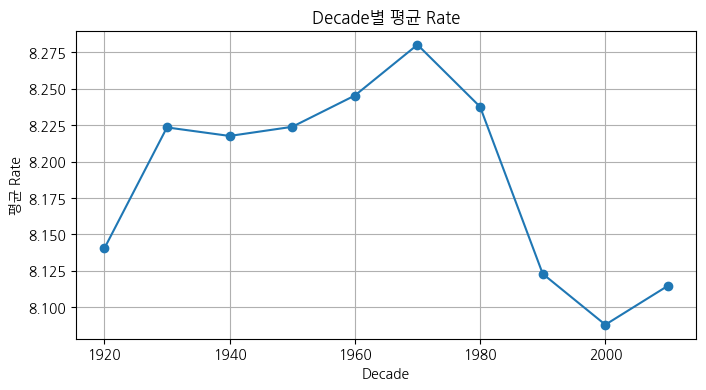

In [14]:
# 1) ÌèâÍ∑† Rate
plt.figure(figsize=(8,4))
plt.plot(decade_avg["Decade"], decade_avg["Avg_Rate"], marker="o")
plt.title("DecadeÎ≥Ñ ÌèâÍ∑† Rate")
plt.xlabel("Decade")
plt.ylabel("ÌèâÍ∑† Rate")
plt.grid(True)
plt.show()

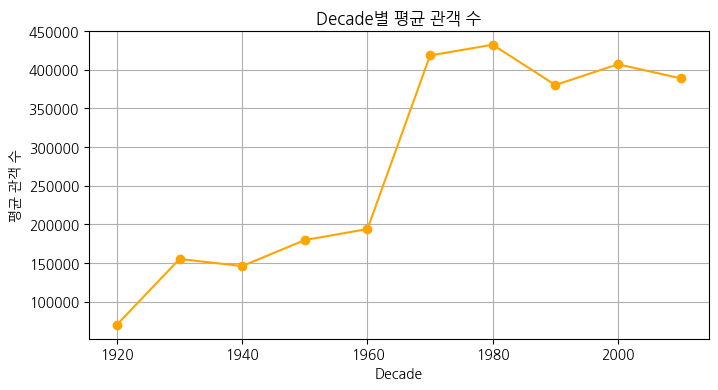

In [15]:
# 2) ÌèâÍ∑† Audience
plt.figure(figsize=(8,4))
plt.plot(decade_avg["Decade"], decade_avg["Avg_Audience"], marker="o", color="orange")
plt.title("DecadeÎ≥Ñ ÌèâÍ∑† Í¥ÄÍ∞ù Ïàò")
plt.xlabel("Decade")
plt.ylabel("ÌèâÍ∑† Í¥ÄÍ∞ù Ïàò")
plt.grid(True)
plt.show()

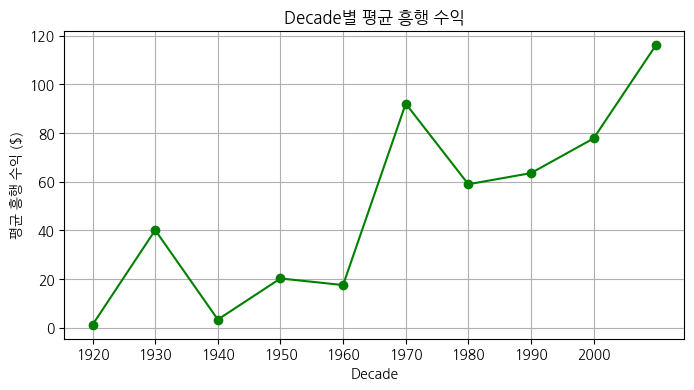

In [16]:
# 3) ÌèâÍ∑† Gross
plt.figure(figsize=(8,4))
plt.plot(decade_avg["Decade"], decade_avg["Avg_Gross"], marker="o", color="green")
plt.title("DecadeÎ≥Ñ ÌèâÍ∑† Ìù•Ìñâ ÏàòÏùµ")
plt.xticks(np.arange(decade_avg["Decade"].min(), decade_avg["Decade"].max(), 10))
plt.xlabel("Decade")
plt.ylabel("ÌèâÍ∑† Ìù•Ìñâ ÏàòÏùµ ($)")
plt.grid(True)
plt.show()

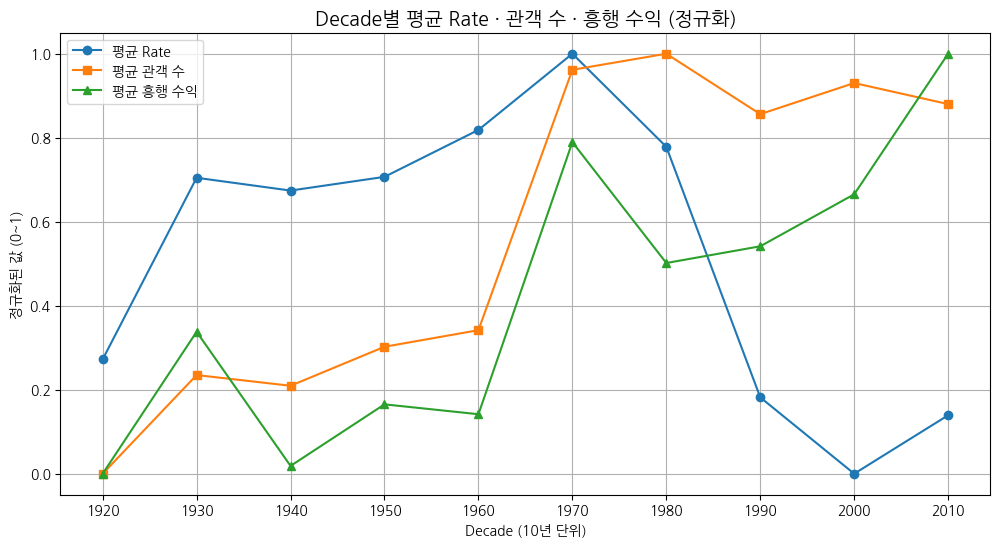

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Min-Max Ï†ïÍ∑úÌôî Ìï®Ïàò
def minmax_norm(series):
    return (series - series.min()) / (series.max() - series.min())

# Ï†ïÍ∑úÌôî Ï†ÅÏö©
decade_avg["Rate_norm"] = minmax_norm(decade_avg["Avg_Rate"])
decade_avg["Audience_norm"] = minmax_norm(decade_avg["Avg_Audience"])
decade_avg["Gross_norm"] = minmax_norm(decade_avg["Avg_Gross"])

# Í∑∏ÎûòÌîÑ
plt.figure(figsize=(12,6))
plt.plot(decade_avg["Decade"], decade_avg["Rate_norm"], marker="o", label="ÌèâÍ∑† Rate")
plt.plot(decade_avg["Decade"], decade_avg["Audience_norm"], marker="s", label="ÌèâÍ∑† Í¥ÄÍ∞ù Ïàò")
plt.plot(decade_avg["Decade"], decade_avg["Gross_norm"], marker="^", label="ÌèâÍ∑† Ìù•Ìñâ ÏàòÏùµ")

plt.xticks(np.arange(decade_avg["Decade"].min(), decade_avg["Decade"].max()+10, 10))
plt.title("DecadeÎ≥Ñ ÌèâÍ∑† Rate ¬∑ Í¥ÄÍ∞ù Ïàò ¬∑ Ìù•Ìñâ ÏàòÏùµ (Ï†ïÍ∑úÌôî)", fontsize=14)
plt.xlabel("Decade (10ÎÖÑ Îã®ÏúÑ)")
plt.ylabel("Ï†ïÍ∑úÌôîÎêú Í∞í (0~1)")
plt.legend()
plt.grid(True)
plt.show()


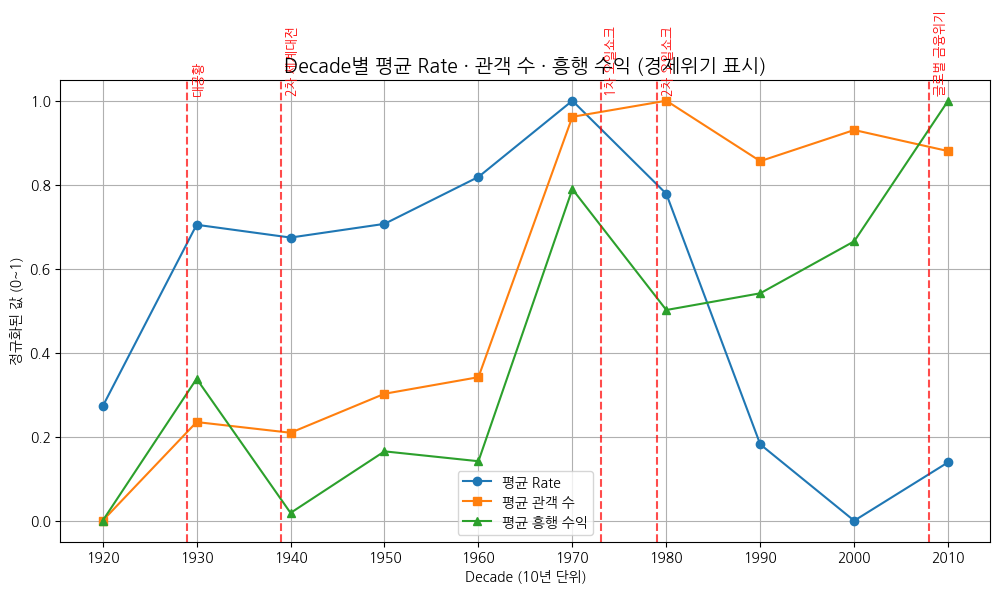

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Í∑∏ÎûòÌîÑ
plt.figure(figsize=(12,6))
plt.plot(decade_avg["Decade"], decade_avg["Rate_norm"], marker="o", label="ÌèâÍ∑† Rate")
plt.plot(decade_avg["Decade"], decade_avg["Audience_norm"], marker="s", label="ÌèâÍ∑† Í¥ÄÍ∞ù Ïàò")
plt.plot(decade_avg["Decade"], decade_avg["Gross_norm"], marker="^", label="ÌèâÍ∑† Ìù•Ìñâ ÏàòÏùµ")

plt.xticks(np.arange(decade_avg["Decade"].min(), decade_avg["Decade"].max()+10, 10))
plt.title("DecadeÎ≥Ñ ÌèâÍ∑† Rate ¬∑ Í¥ÄÍ∞ù Ïàò ¬∑ Ìù•Ìñâ ÏàòÏùµ (Í≤ΩÏ†úÏúÑÍ∏∞ ÌëúÏãú)", fontsize=14)
plt.xlabel("Decade (10ÎÖÑ Îã®ÏúÑ)")
plt.ylabel("Ï†ïÍ∑úÌôîÎêú Í∞í (0~1)")
plt.legend()
plt.grid(True)

# üìå Ï£ºÏöî Í≤ΩÏ†úÏúÑÍ∏∞ Ïó∞ÎèÑ (ÎåÄÌëúÏ†ÅÏù∏ Î™á Í∞ú)
crisis_years = {
    1929: "ÎåÄÍ≥µÌô©",
    1939: "2Ï∞® ÏÑ∏Í≥ÑÎåÄÏ†Ñ",
    1973: "1Ï∞® Ïò§ÏùºÏáºÌÅ¨",
    1979: "2Ï∞® Ïò§ÏùºÏáºÌÅ¨",
    2008: "Í∏ÄÎ°úÎ≤å Í∏àÏúµÏúÑÍ∏∞",
}

# ÏàòÏßÅÏÑ† Ï∂îÍ∞Ä
for year, label in crisis_years.items():
    plt.axvline(x=year, color="red", linestyle="--", alpha=0.7)
    plt.text(year+0.5, 1.02, label, rotation=90, color="red", fontsize=9)

plt.show()


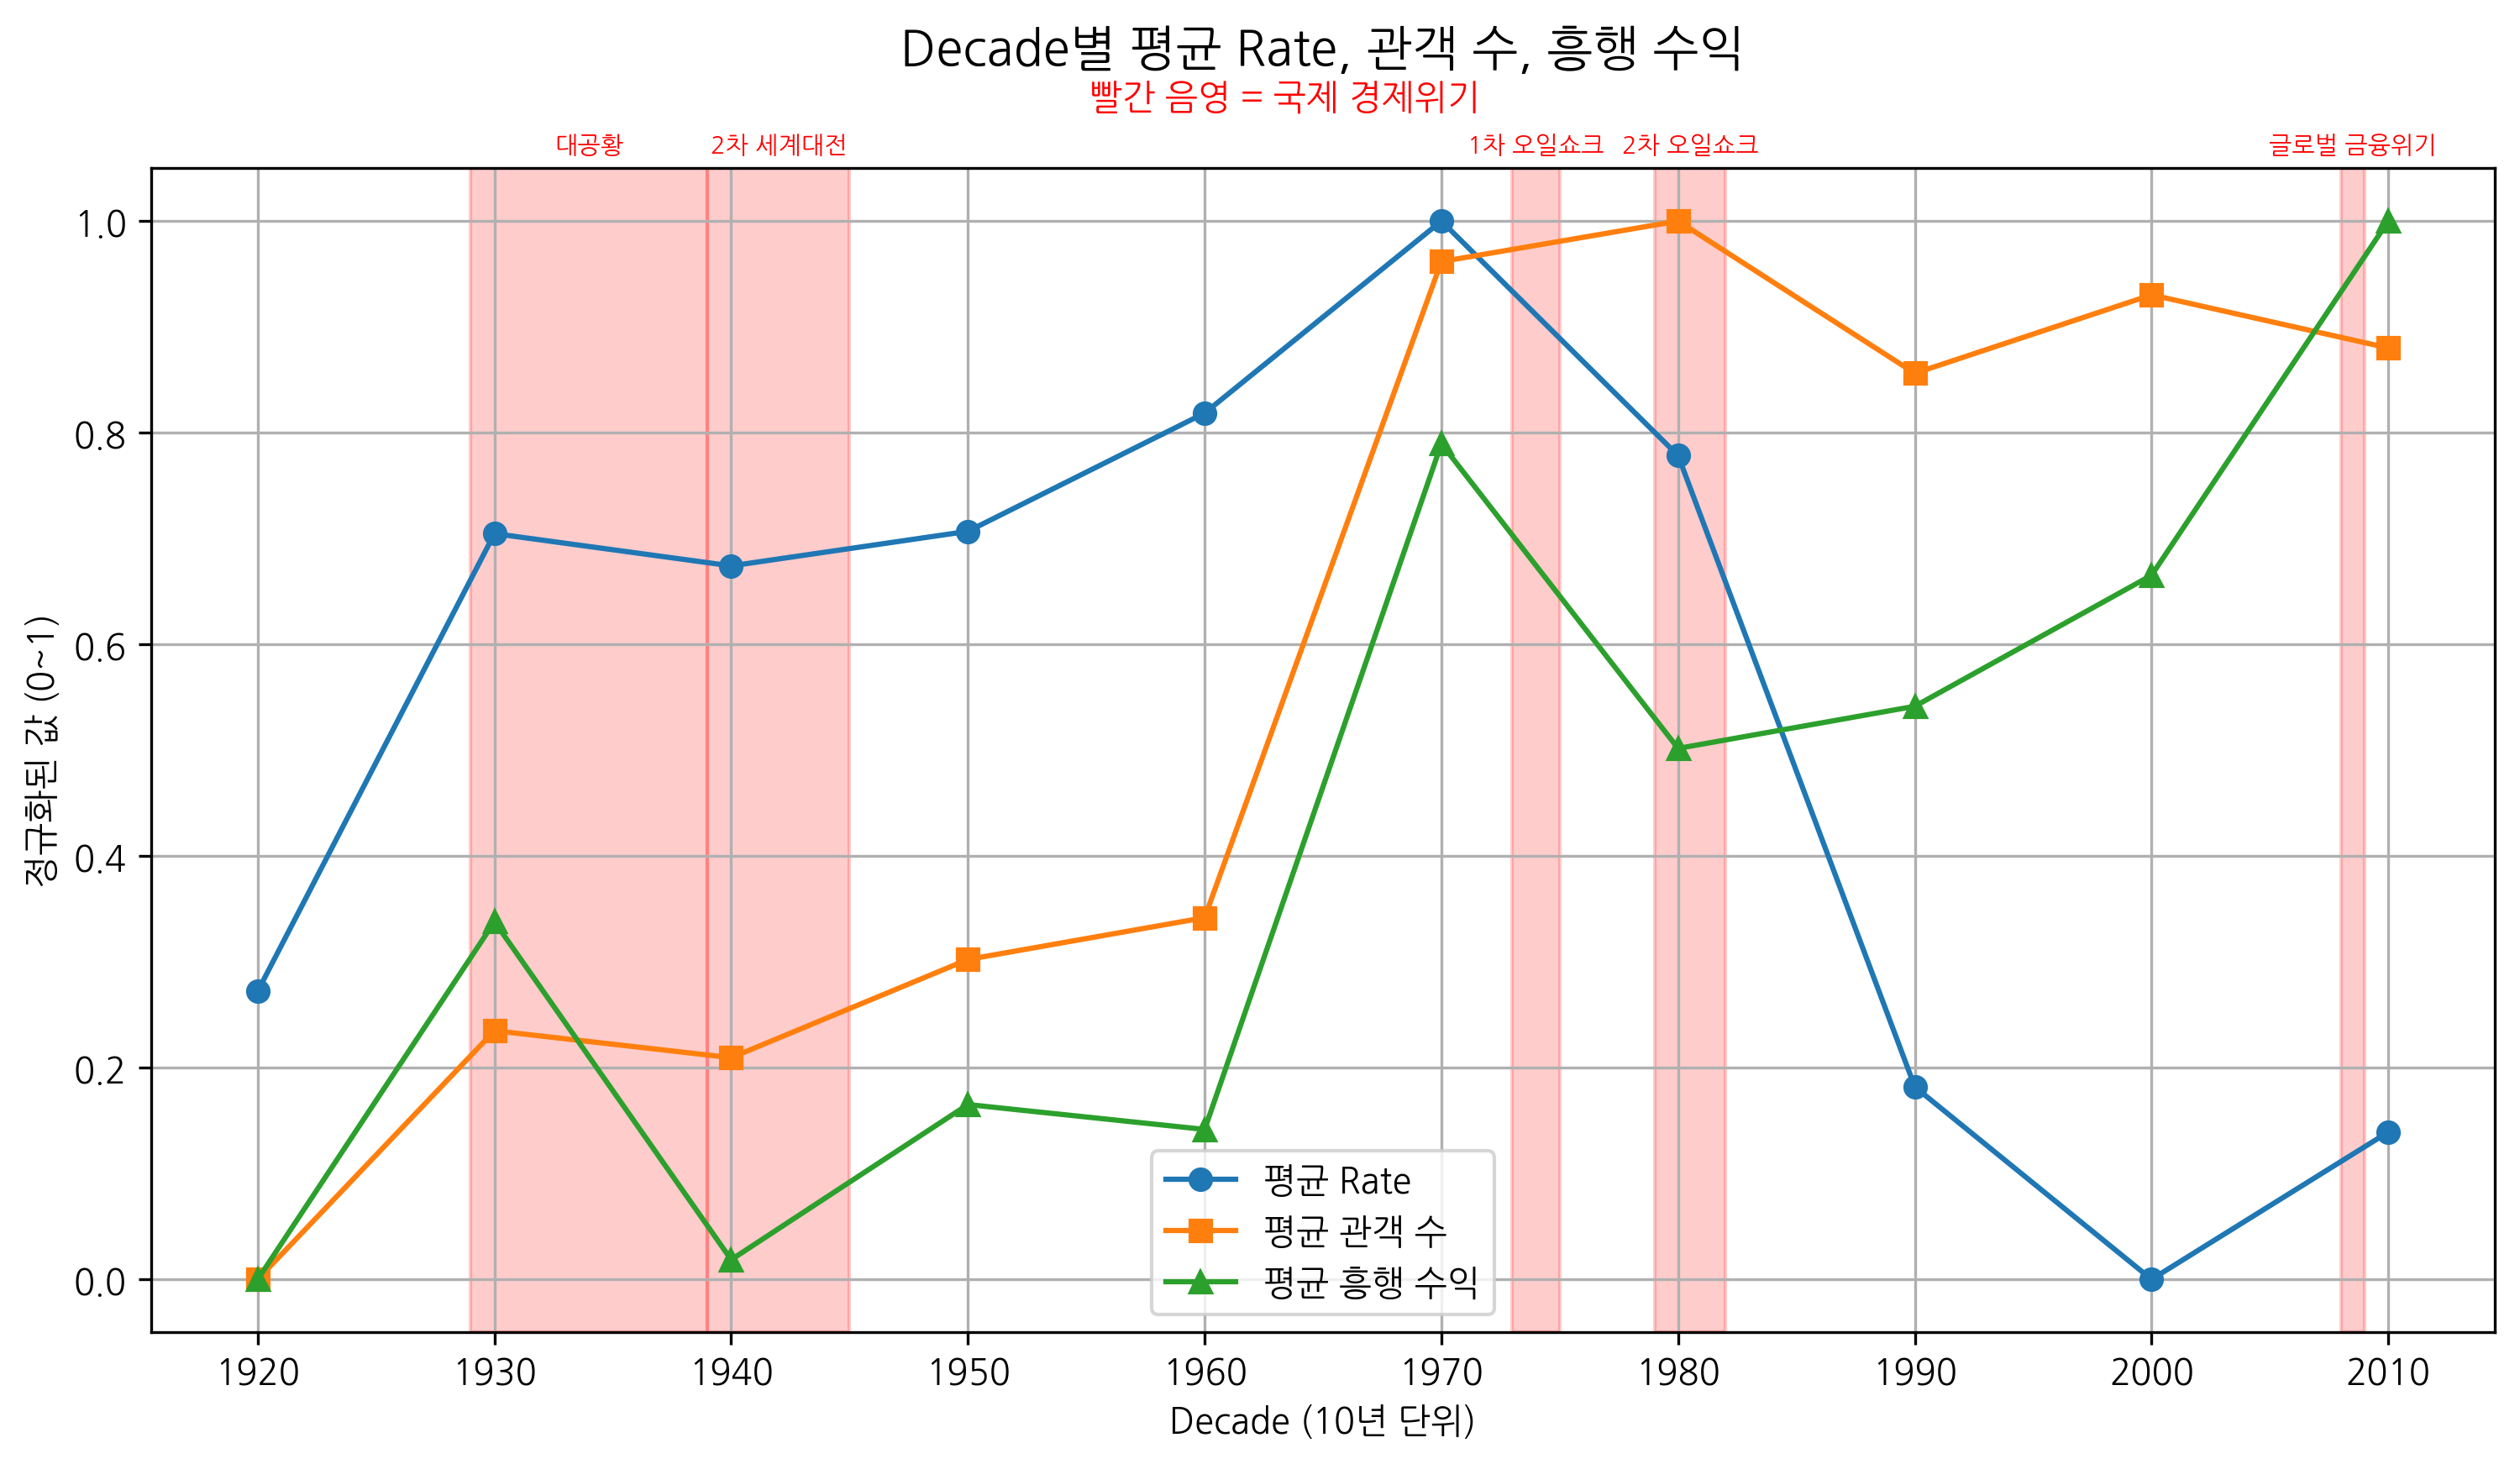

In [19]:
import matplotlib.pyplot as plt
import numpy as np

decade_avg["Rate_norm"] = minmax_norm(decade_avg["Avg_Rate"])
decade_avg["Audience_norm"] = minmax_norm(decade_avg["Avg_Audience"])
decade_avg["Gross_norm"] = minmax_norm(decade_avg["Avg_Gross"])

# Í∑∏ÎûòÌîÑ
plt.figure(figsize=(12,6),dpi=300)
plt.plot(decade_avg["Decade"], decade_avg["Rate_norm"], marker="o", label="ÌèâÍ∑† Rate")
plt.plot(decade_avg["Decade"], decade_avg["Audience_norm"], marker="s", label="ÌèâÍ∑† Í¥ÄÍ∞ù Ïàò")
plt.plot(decade_avg["Decade"], decade_avg["Gross_norm"], marker="^", label="ÌèâÍ∑† Ìù•Ìñâ ÏàòÏùµ")

plt.xticks(np.arange(decade_avg["Decade"].min(), decade_avg["Decade"].max()+10, 10))
plt.title("DecadeÎ≥Ñ ÌèâÍ∑† Rate, Í¥ÄÍ∞ù Ïàò, Ìù•Ìñâ ÏàòÏùµ", fontsize=14, pad = 30)
plt.xlabel("Decade (10ÎÖÑ Îã®ÏúÑ)")
plt.ylabel("Ï†ïÍ∑úÌôîÎêú Í∞í (0~1)")
plt.legend()
plt.grid(True)

# üìå Íµ≠Ï†ú Í≤ΩÏ†úÏúÑÍ∏∞ Î≤îÏúÑ (xmin, xmax, label)
crisis_ranges = [
    (1929, 1939, "ÎåÄÍ≥µÌô©"),
    (1939, 1945, "2Ï∞® ÏÑ∏Í≥ÑÎåÄÏ†Ñ"),
    (1973, 1975, "1Ï∞® Ïò§ÏùºÏáºÌÅ¨"),
    (1979, 1982, "2Ï∞® Ïò§ÏùºÏáºÌÅ¨"),
    (2008, 2009, "Í∏ÄÎ°úÎ≤å Í∏àÏúµÏúÑÍ∏∞"),
]

# Î≤îÏúÑ ÏùåÏòÅ Ï∂îÍ∞Ä
for xmin, xmax, label in crisis_ranges:
    plt.axvspan(xmin, xmax, color="red", alpha=0.2)
    plt.text((xmin+xmax)/2, 1.06, label, ha="center", va="bottom", color="red", fontsize=7)

plt.figtext(0.5, 0.92, "Îπ®Í∞Ñ ÏùåÏòÅ = Íµ≠Ï†ú Í≤ΩÏ†úÏúÑÍ∏∞", ha="center", color="red", fontsize=10)

plt.show()


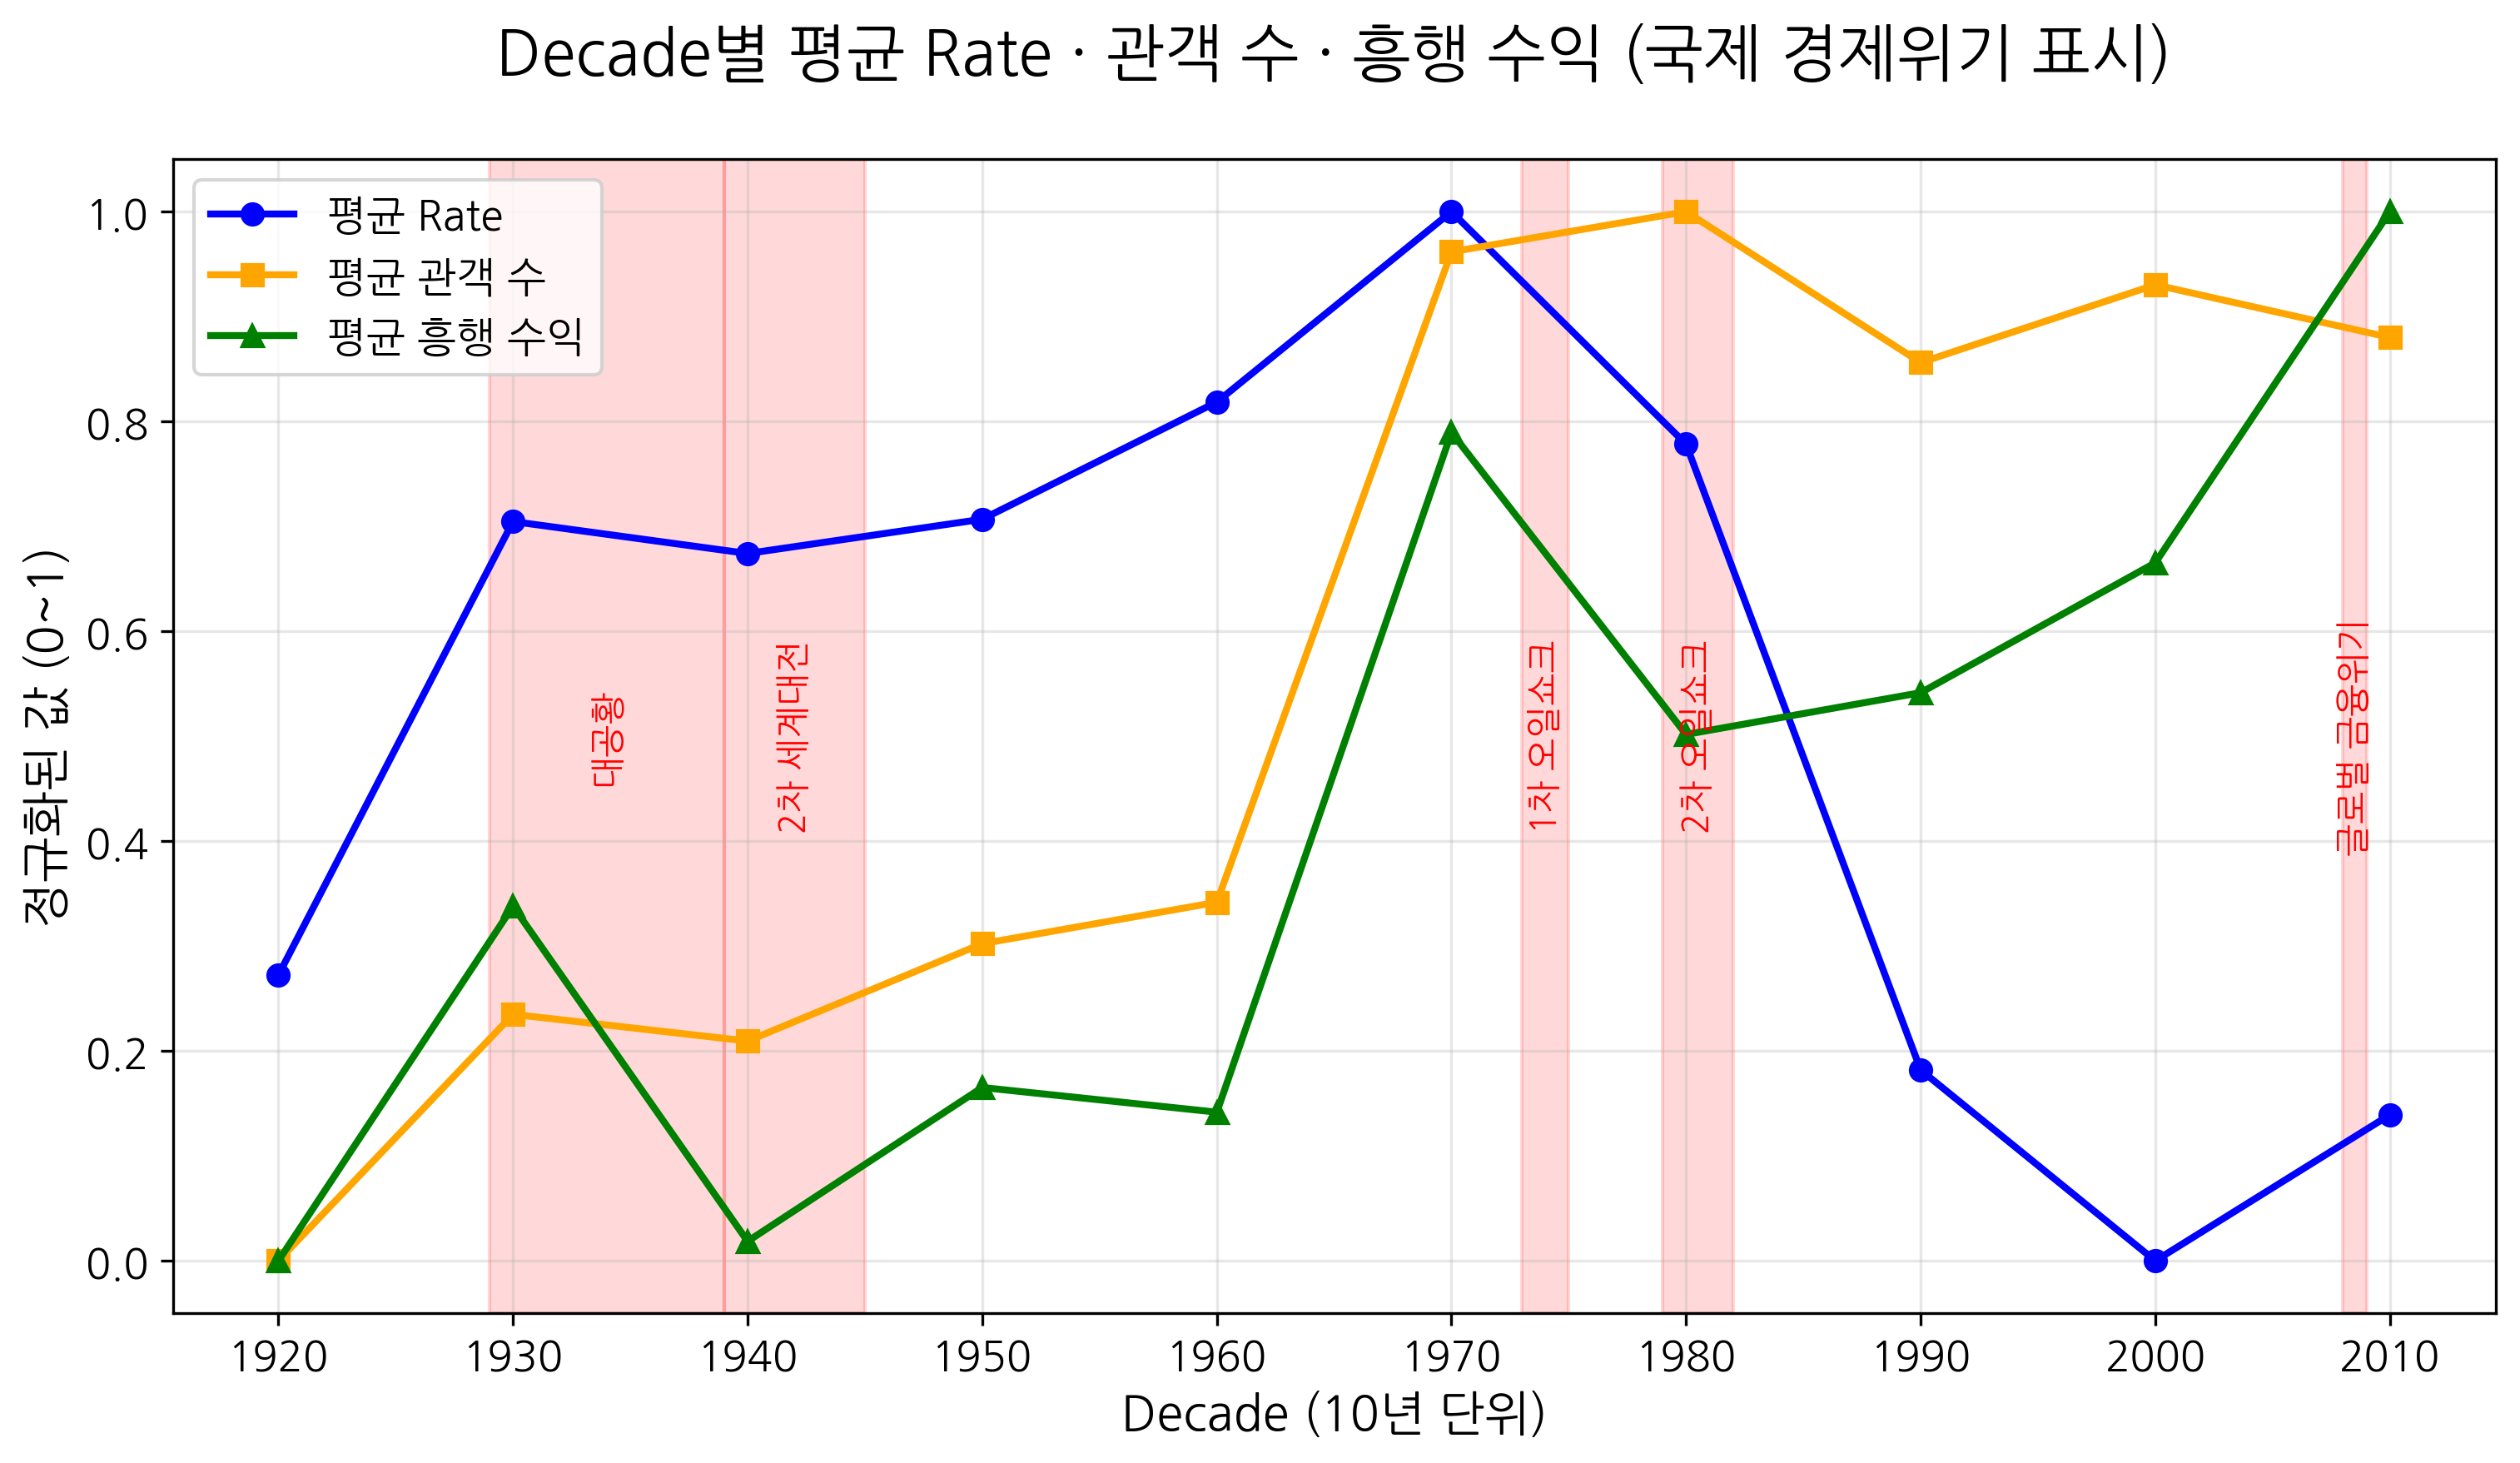

In [20]:
plt.figure(figsize=(12,6), dpi=300)

plt.plot(decade_avg["Decade"], decade_avg["Rate_norm"],
         marker="o", color="blue", linewidth=2, label="ÌèâÍ∑† Rate")
plt.plot(decade_avg["Decade"], decade_avg["Audience_norm"],
         marker="s", color="orange", linewidth=2, label="ÌèâÍ∑† Í¥ÄÍ∞ù Ïàò")
plt.plot(decade_avg["Decade"], decade_avg["Gross_norm"],
         marker="^", color="green", linewidth=2, label="ÌèâÍ∑† Ìù•Ìñâ ÏàòÏùµ")

plt.xticks(np.arange(decade_avg["Decade"].min(),
                     decade_avg["Decade"].max()+10, 10), fontsize=12)
plt.yticks(fontsize=12)

plt.title("DecadeÎ≥Ñ ÌèâÍ∑† Rate ¬∑ Í¥ÄÍ∞ù Ïàò ¬∑ Ìù•Ìñâ ÏàòÏùµ (Íµ≠Ï†ú Í≤ΩÏ†úÏúÑÍ∏∞ ÌëúÏãú)",
          fontsize=18, pad=25)
plt.xlabel("Decade (10ÎÖÑ Îã®ÏúÑ)", fontsize=14)
plt.ylabel("Ï†ïÍ∑úÌôîÎêú Í∞í (0~1)", fontsize=14)
plt.grid(True, alpha=0.3)

# Í≤ΩÏ†úÏúÑÍ∏∞ Î≤îÏúÑ ÏùåÏòÅ + ÏÑ∏Î°ú ÎùºÎ≤®
for xmin, xmax, label in crisis_ranges:
    plt.axvspan(xmin, xmax, color="red", alpha=0.15)
    plt.text((xmin+xmax)/2, 0.5, label, ha="center", va="center",
             rotation=90, color="red", fontsize=10)

# Î≤îÎ°Ä
plt.legend(fontsize=12, frameon=True, facecolor="white", loc="upper left")

# Ï†ÄÏû•
plt.savefig("decade_trends_presentation.png", dpi=300, bbox_inches="tight")
plt.show()


#### 2.ÏãúÍ∏∞Î≥Ñ Ïû•Î•¥Î≥Ñ ÌèâÍ∑† ÌäπÏÑ± ÏãúÍ∞ÅÌôî

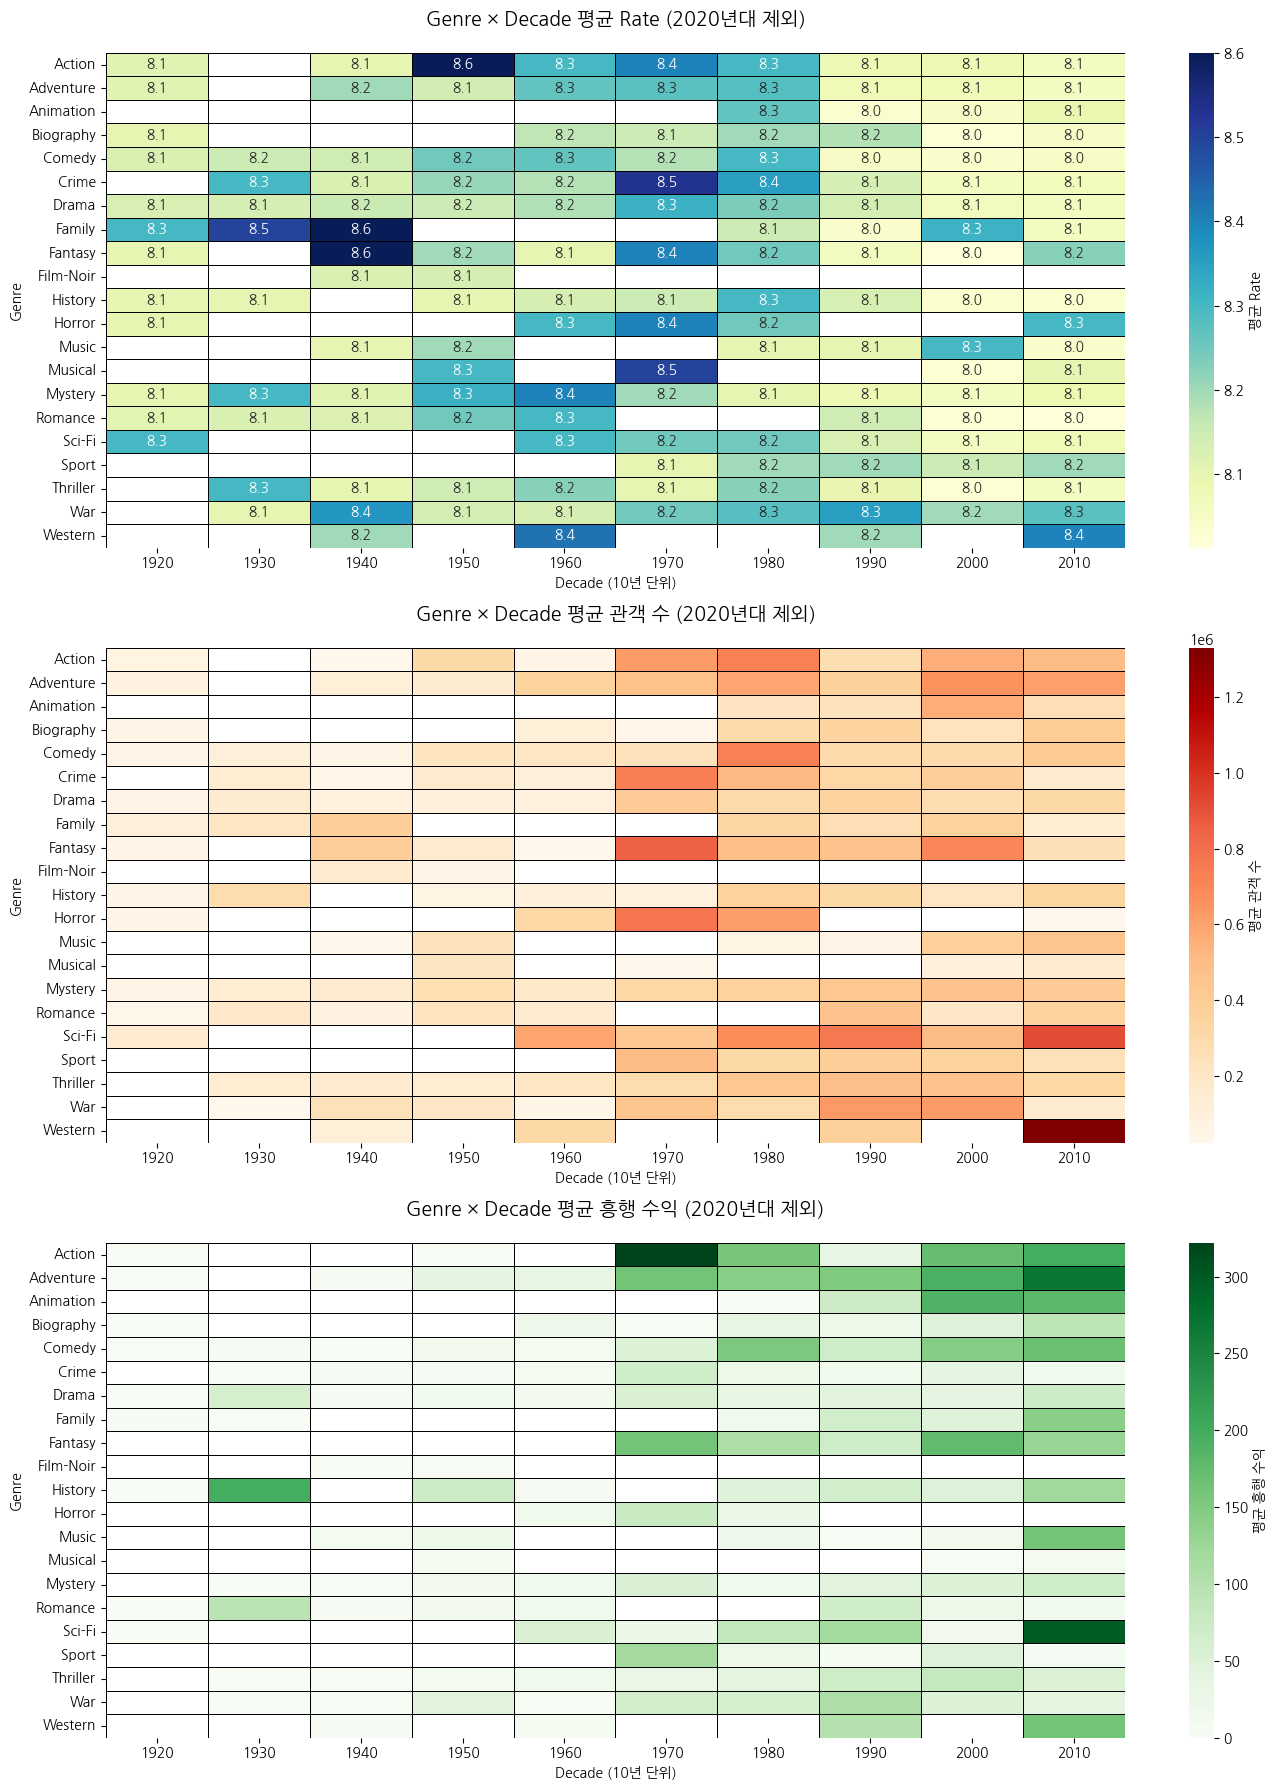

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# 2020ÎÖÑÎåÄ Ï†úÏô∏
result_filtered = result[result["Decade"] < 2020]

# Pivot ÌÖåÏù¥Î∏î ÏÉùÏÑ±
pivot_rate = result_filtered.pivot(index="Genre", columns="Decade", values="Avg_Rate")
pivot_aud = result_filtered.pivot(index="Genre", columns="Decade", values="Avg_Audience")
pivot_gross = result_filtered.pivot(index="Genre", columns="Decade", values="Avg_Gross")

# Figure + Subplots
fig, axes = plt.subplots(3, 1, figsize=(14,18))

# 1) ÌèâÍ∑† Rate ÌûàÌä∏Îßµ
sns.heatmap(pivot_rate, annot=True, fmt=".1f", cmap="YlGnBu",
            cbar_kws={'label': 'ÌèâÍ∑† Rate'}, ax=axes[0],
            linewidths=0.5, linecolor="black")
axes[0].set_title("Genre √ó Decade ÌèâÍ∑† Rate (2020ÎÖÑÎåÄ Ï†úÏô∏)", fontsize=14, pad=20)
axes[0].set_xlabel("Decade (10ÎÖÑ Îã®ÏúÑ)")
axes[0].set_ylabel("Genre")

# 2) ÌèâÍ∑† Audience ÌûàÌä∏Îßµ
sns.heatmap(pivot_aud, annot=False, cmap="OrRd",
            cbar_kws={'label': 'ÌèâÍ∑† Í¥ÄÍ∞ù Ïàò'}, ax=axes[1],
            linewidths=0.5, linecolor="black")
axes[1].set_title("Genre √ó Decade ÌèâÍ∑† Í¥ÄÍ∞ù Ïàò (2020ÎÖÑÎåÄ Ï†úÏô∏)", fontsize=14, pad=20)
axes[1].set_xlabel("Decade (10ÎÖÑ Îã®ÏúÑ)")
axes[1].set_ylabel("Genre")

# 3) ÌèâÍ∑† Gross ÌûàÌä∏Îßµ
sns.heatmap(pivot_gross, annot=False, cmap="Greens",
            cbar_kws={'label': 'ÌèâÍ∑† Ìù•Ìñâ ÏàòÏùµ'}, ax=axes[2],
            linewidths=0.5, linecolor="black")
axes[2].set_title("Genre √ó Decade ÌèâÍ∑† Ìù•Ìñâ ÏàòÏùµ (2020ÎÖÑÎåÄ Ï†úÏô∏)", fontsize=14, pad=20)
axes[2].set_xlabel("Decade (10ÎÖÑ Îã®ÏúÑ)")
axes[2].set_ylabel("Genre")

plt.tight_layout()
plt.show()


In [22]:
display(result_filtered['Genre'].unique())
print(f'ÌäπÏÑ± Í∞úÏàò ÌôïÏù∏: {len(result_filtered['Genre'].unique())}')

array(['Action', 'Adventure', 'Biography', 'Comedy', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Mystery', 'Romance', 'Sci-Fi',
       'Crime', 'Thriller', 'War', 'Film-Noir', 'Music', 'Western',
       'Musical', 'Sport', 'Animation'], dtype=object)

ÌäπÏÑ± Í∞úÏàò ÌôïÏù∏: 21


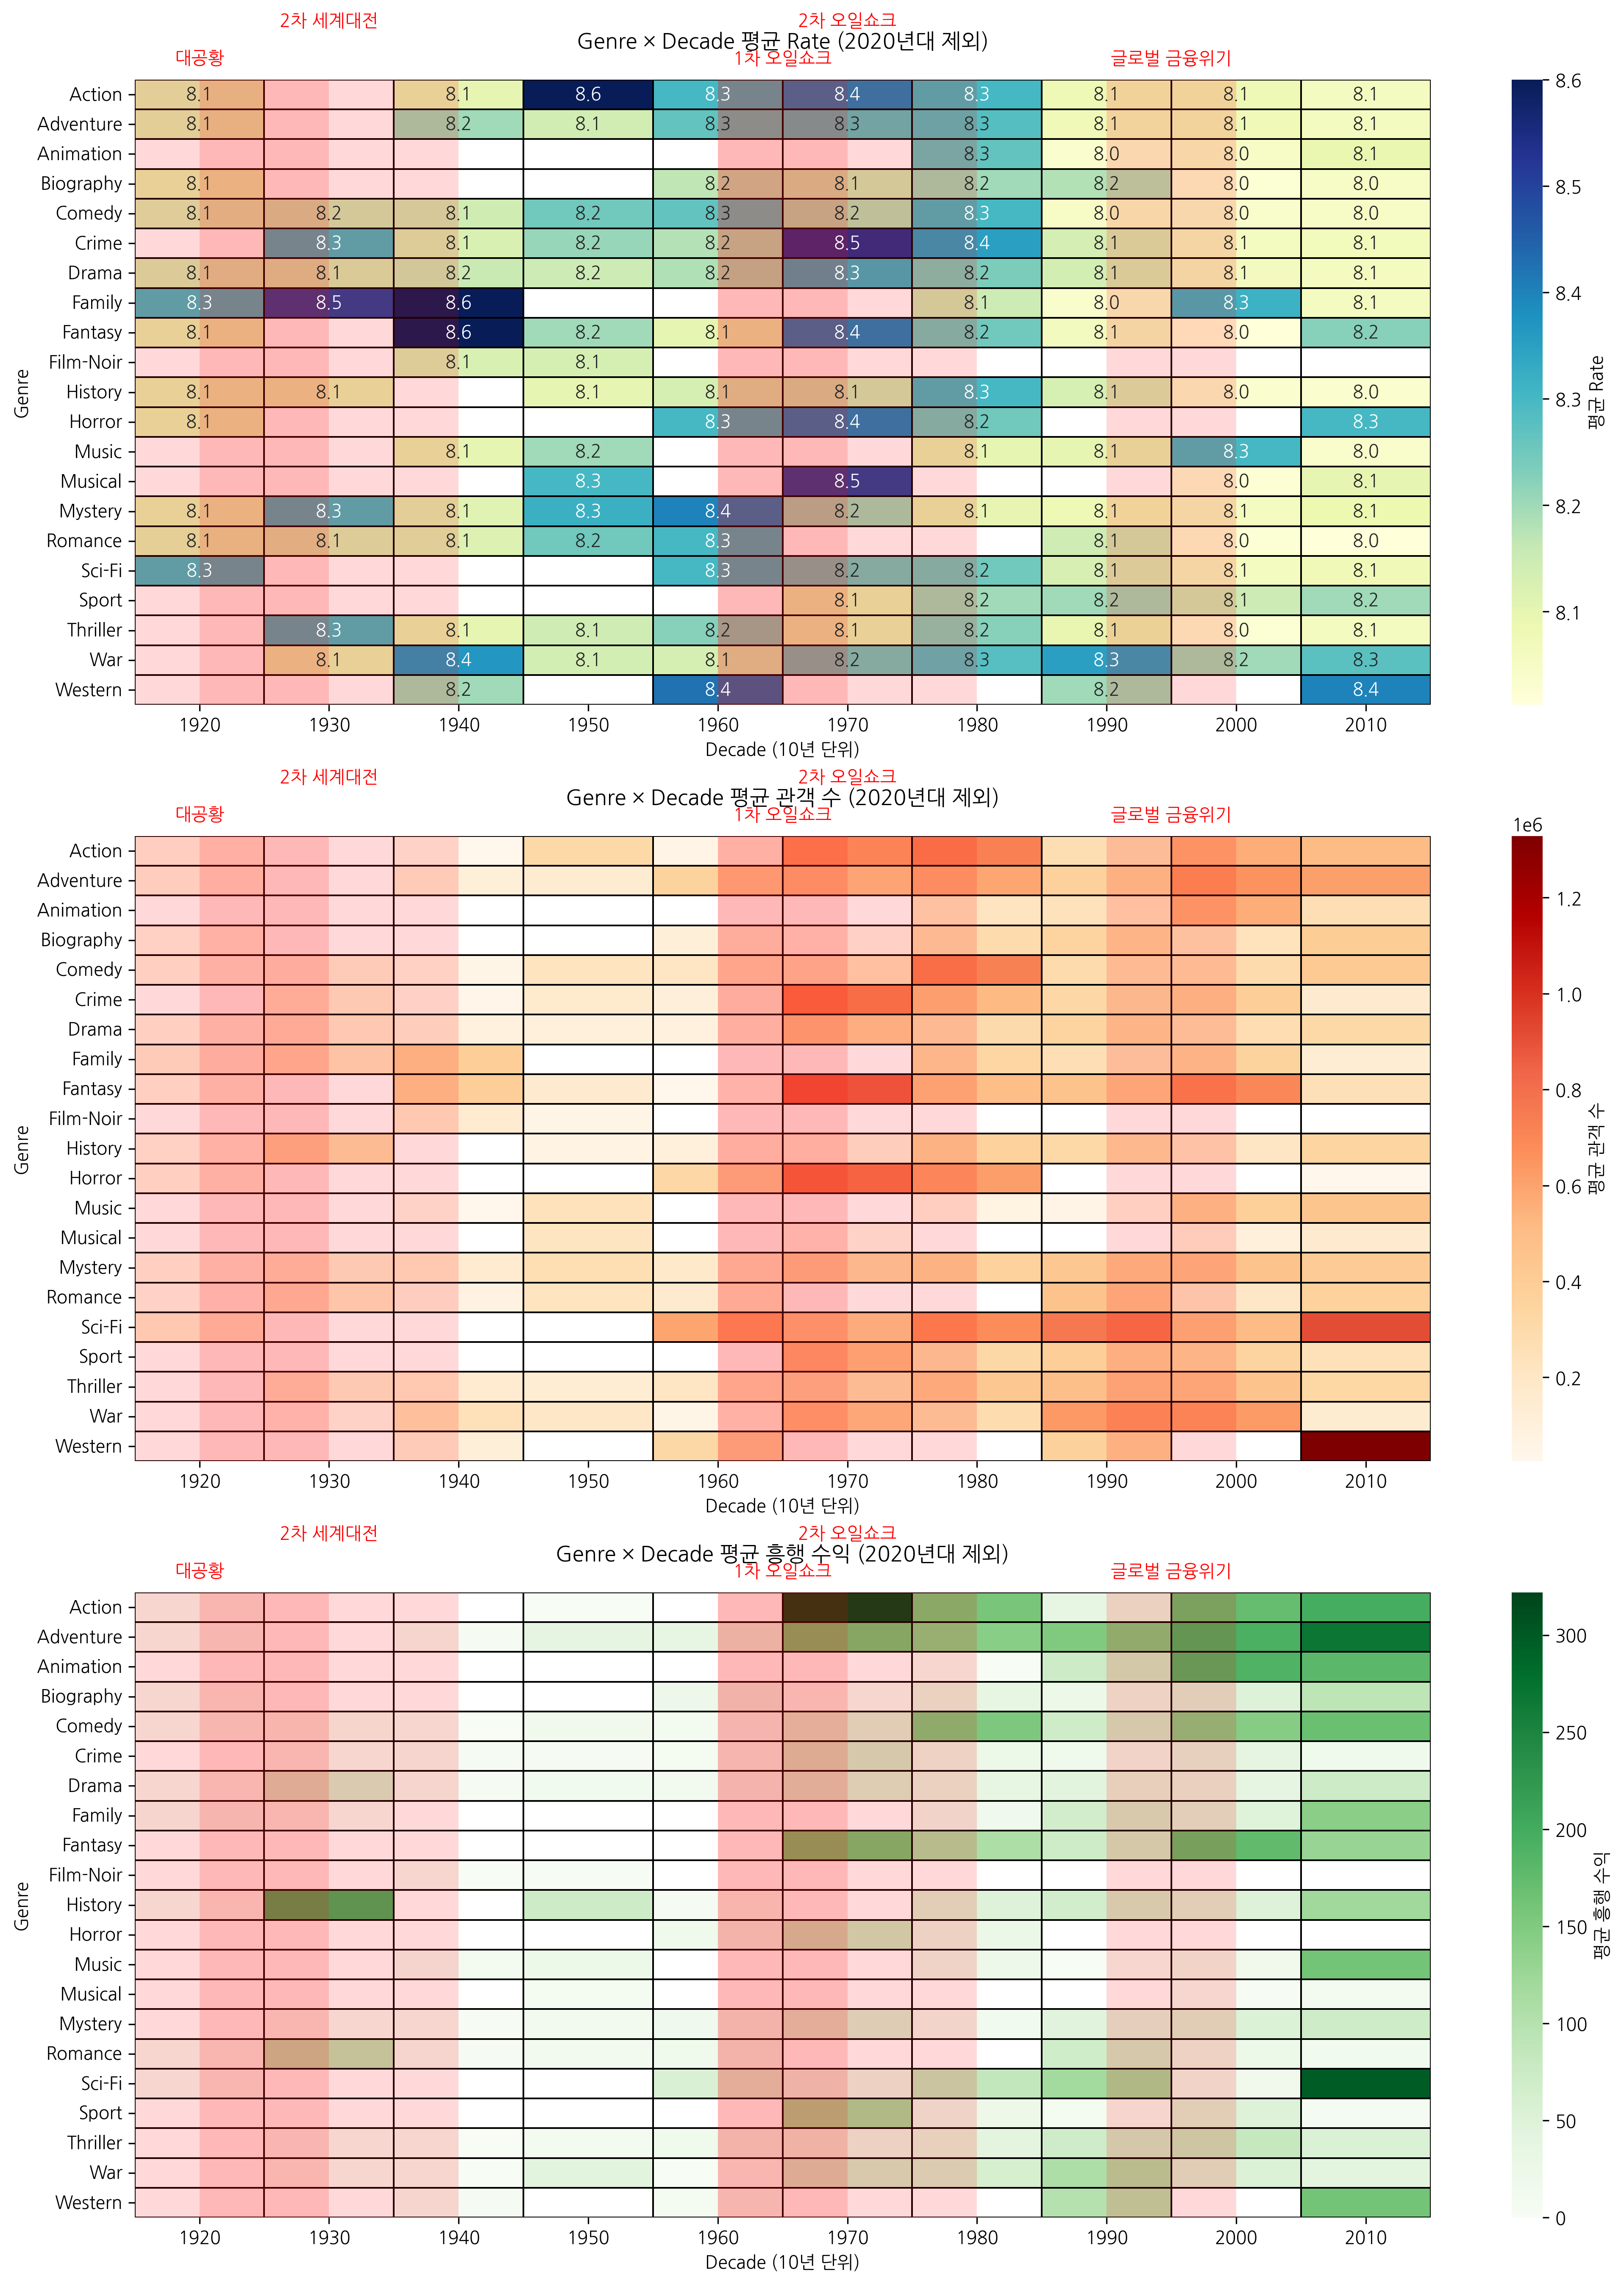

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1) 2020ÎÖÑÎåÄ Ï†úÏô∏
result_filtered = result[result["Decade"] < 2020].copy()

# 2) ÌîºÎ≤ó(Ìñâ=Genre, Ïó¥=Decade)
p_rate  = result_filtered.pivot(index="Genre", columns="Decade", values="Avg_Rate")
p_aud   = result_filtered.pivot(index="Genre", columns="Decade", values="Avg_Audience")
p_gross = result_filtered.pivot(index="Genre", columns="Decade", values="Avg_Gross")

# 3) Í≤ΩÏ†úÏúÑÍ∏∞ Î≤îÏúÑ Ï†ïÏùò (ÏãúÏûëÏó∞ÎèÑ, ÎÅùÏó∞ÎèÑ, ÎùºÎ≤®)
crises = [
    (1929, 1939, "ÎåÄÍ≥µÌô©"),
    (1939, 1945, "2Ï∞® ÏÑ∏Í≥ÑÎåÄÏ†Ñ"),
    (1973, 1975, "1Ï∞® Ïò§ÏùºÏáºÌÅ¨"),
    (1979, 1982, "2Ï∞® Ïò§ÏùºÏáºÌÅ¨"),
    (2008, 2009, "Í∏ÄÎ°úÎ≤å Í∏àÏúµÏúÑÍ∏∞"),
]

# 4) ÌûàÌä∏Îßµ ÏúÑÏóê Í≤ΩÏ†úÏúÑÍ∏∞ Î≤îÏúÑÎ•º Ïπ†ÌïòÎäî Ìï®Ïàò
def shade_crises_on_heatmap(ax, columns, crises, color="red", alpha=0.15, stagger=True):
    cols = list(columns)                  # Ïòà: [1920, 1930, ... , 2010]
    for i, (start, end, label) in enumerate(crises):
        # ÏúÑÍ∏∞ Íµ¨Í∞ÑÏù¥ Í≤πÏπòÎäî 'Decade' Ïó¥Îì§ ÏÑ†ÌÉù
        decades = np.arange((start//10)*10, (end//10)*10 + 1, 10)
        idxs = [cols.index(d) for d in decades if d in cols]
        if not idxs:
            continue
        i0, i1 = min(idxs), max(idxs)
        # Ïó¥ Í≤ΩÍ≥ÑÎäî -0.5 ~ n-0.5 Ïù¥ÎØÄÎ°ú, Ìï¥Îãπ Íµ¨Í∞ÑÏùÑ ÏùåÏòÅ Ï≤òÎ¶¨
        ax.axvspan(i0-0.5, i1+0.5, color=color, alpha=alpha, lw=0)
        # ÎùºÎ≤®ÏùÄ xÏ∂ï Î≥ÄÌôò(Îç∞Ïù¥ÌÑ∞=Í∞ÄÎ°ú, y=Ï∂ïÎπÑÏú®) Ï¢åÌëúÎ°ú ÏúÑÏ™ΩÏóê Î∞∞Ïπò
        y = 1.02 + (0.06 if (stagger and i % 2) else 0.0)  # Î≤àÍ∞àÏïÑ ÏúÑÎ°ú ÎùÑÏõå Í≤πÏπ® Î∞©ÏßÄ
        x = (i0 + i1) / 2
        ax.text(x, y, label, transform=ax.get_xaxis_transform(),
                ha="center", va="bottom", fontsize=10, color=color)

# 5) Ìïú FigureÏóê 3Í∞ú ÏÑúÎ∏åÌîåÎ°Ø
fig, axes = plt.subplots(3, 1, figsize=(14, 18), dpi=300)

sns.heatmap(p_rate,  annot=True, fmt=".1f", cmap="YlGnBu",
            cbar_kws={'label': 'ÌèâÍ∑† Rate'},  linewidths=0.5, linecolor="black", ax=axes[0])
axes[0].set_title("Genre √ó Decade ÌèâÍ∑† Rate (2020ÎÖÑÎåÄ Ï†úÏô∏)", pad=18)
axes[0].set_xlabel("Decade (10ÎÖÑ Îã®ÏúÑ)"); axes[0].set_ylabel("Genre")
shade_crises_on_heatmap(axes[0], p_rate.columns, crises)

sns.heatmap(p_aud,   annot=False,          cmap="OrRd",
            cbar_kws={'label': 'ÌèâÍ∑† Í¥ÄÍ∞ù Ïàò'}, linewidths=0.5, linecolor="black", ax=axes[1])
axes[1].set_title("Genre √ó Decade ÌèâÍ∑† Í¥ÄÍ∞ù Ïàò (2020ÎÖÑÎåÄ Ï†úÏô∏)", pad=18)
axes[1].set_xlabel("Decade (10ÎÖÑ Îã®ÏúÑ)"); axes[1].set_ylabel("Genre")
shade_crises_on_heatmap(axes[1], p_aud.columns, crises)

sns.heatmap(p_gross, annot=False,          cmap="Greens",
            cbar_kws={'label': 'ÌèâÍ∑† Ìù•Ìñâ ÏàòÏùµ'}, linewidths=0.5, linecolor="black", ax=axes[2])
axes[2].set_title("Genre √ó Decade ÌèâÍ∑† Ìù•Ìñâ ÏàòÏùµ (2020ÎÖÑÎåÄ Ï†úÏô∏)", pad=18)
axes[2].set_xlabel("Decade (10ÎÖÑ Îã®ÏúÑ)"); axes[2].set_ylabel("Genre")
shade_crises_on_heatmap(axes[2], p_gross.columns, crises)

plt.tight_layout()
plt.show()
